# MNIST Character Detection Database 

MNIST ("Modified National Institute of Standards and Technology") is the de facto “Hello World” dataset of computer vision.
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

Dataset: https://www.kaggle.com/oddrationale/mnist-in-csv

# Importing the Dataset

In [28]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


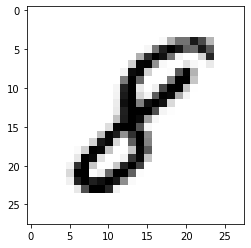

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7777 
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


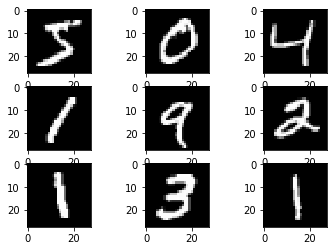

In [24]:
from matplotlib import pyplot
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figur

"You always have to give a 4D array as input to the CNN. So input data has a shape of (batch_size, height, width, depth), where the first dimension represents the batch size of the image and the other three dimensions represent dimensions of the image which are height, width, and depth. For some of you who are wondering what is the depth of the image, it’s nothing but the number of color channels. For example, an RGB image would have a depth of 3, and the greyscale image would have a depth of 1."

In [3]:
x_train.shape

(60000, 28, 28)

In [61]:
type(x_train)

numpy.ndarray

### CNN Inputs & Outputs
- You always have to feed a 4D array of shape (batch_size, height, width, depth) to the CNN.
- Output data from CNN is also a 4D array of shape (batch_size, height, width, depth).
- To add a Dense layer on top of the CNN layer, we have to change the 4D output of CNN to 2D using a Flatten layer.

In [29]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


# Building the CNN Network

In [30]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense

In [31]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(10, activation = 'softmax'))

In [32]:
classifier.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Compiling the CNN
history = classifier.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.2088 - accuracy: 0.9374
Epoch 2/10
60000/60000 [==============================] - 40s 672us/step - loss: 0.0848 - accuracy: 0.9742
Epoch 3/10
60000/60000 [==============================] - 42s 699us/step - loss: 0.0593 - accuracy: 0.9818
Epoch 4/10
60000/60000 [==============================] - 35s 578us/step - loss: 0.0429 - accuracy: 0.9865
Epoch 5/10
60000/60000 [==============================] - 39s 649us/step - loss: 0.0357 - accuracy: 0.9880
Epoch 6/10
60000/60000 [==============================] - 38s 629us/step - loss: 0.0291 - accuracy: 0.9904
Epoch 7/10
60000/60000 [==============================] - 37s 609us/step - loss: 0.0241 - accuracy: 0.9919
Epoch 8/10
60000/60000 [==============================] - 44s 741us/step - loss: 0.0215 - accuracy: 0.9919
Epoch 9/10
60000/60000 [==============================] - 44s 740us/step - loss: 0.0197 - accuracy: 0.9936
Epoch 10/10
60000/60000 [============

In [6]:
classifier.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 114us/step


[0.05850444969794216, 0.9853000044822693]

### Reverse One-Hot Encoding  

In [33]:
classifier.predict(x_test)

array([[8.6690902e-14, 4.2049911e-14, 2.3245168e-10, ..., 1.0000000e+00,
        7.7061335e-12, 1.2812049e-11],
       [5.7244404e-11, 1.0057727e-07, 9.9999940e-01, ..., 1.2243007e-21,
        5.8745940e-15, 6.7216496e-23],
       [1.3643486e-08, 9.9997222e-01, 3.1525258e-07, ..., 6.4548152e-07,
        1.8762506e-05, 4.4890311e-12],
       ...,
       [4.4888010e-25, 9.4052870e-15, 1.4414652e-18, ..., 2.7942952e-12,
        2.8084278e-12, 2.2607463e-11],
       [2.2619480e-16, 6.1960977e-18, 1.1943616e-16, ..., 1.4421157e-16,
        5.3926524e-08, 2.3867759e-19],
       [4.8209749e-13, 7.7008577e-16, 1.5133024e-13, ..., 1.7954856e-19,
        1.1861956e-12, 1.0644644e-18]], dtype=float32)

In [20]:
len(classifier.predict(x_test))

10000

In [29]:
y_pred = classifier.predict(x_test)

In [68]:
y_pred

array([[2.4844543e-38, 4.4463239e-36, 5.7518314e-32, ..., 1.0000000e+00,
        1.6372979e-27, 9.9436891e-26],
       [2.9149597e-35, 7.7088602e-29, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.4025283e-35, 1.0000000e+00, 5.4272422e-26, ..., 6.7460829e-23,
        2.4099521e-25, 2.2508937e-33],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.3120105e-34, 2.2955718e-38],
       [0.0000000e+00, 3.3652723e-37, 0.0000000e+00, ..., 0.0000000e+00,
        1.7795442e-33, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 5.2760501e-37, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [30]:
import numpy as np
y_pred_list = np.zeros(np.array(y_pred.tolist()).shape[0])
for i in range(len(y_pred.tolist())):
    for j in range(len(y_pred.tolist()[i])):
        if y_pred[i][j] == max(y_pred[i]):
            y_pred_list[i] = j+1

In [31]:
y_pred_list

array([8., 3., 2., ..., 5., 6., 7.])

In [71]:
list(map(int, y_pred_list))

[8,
 3,
 2,
 1,
 5,
 2,
 5,
 10,
 6,
 10,
 1,
 7,
 10,
 1,
 2,
 6,
 10,
 8,
 6,
 5,
 10,
 7,
 7,
 6,
 5,
 1,
 8,
 5,
 1,
 2,
 4,
 2,
 4,
 5,
 8,
 3,
 8,
 2,
 3,
 2,
 2,
 8,
 5,
 3,
 4,
 6,
 2,
 3,
 5,
 5,
 7,
 4,
 6,
 6,
 7,
 1,
 5,
 2,
 10,
 6,
 8,
 9,
 10,
 4,
 8,
 5,
 7,
 5,
 4,
 1,
 8,
 1,
 3,
 10,
 2,
 8,
 4,
 3,
 10,
 8,
 8,
 7,
 3,
 8,
 9,
 5,
 8,
 4,
 7,
 2,
 4,
 7,
 10,
 4,
 2,
 5,
 2,
 8,
 7,
 10,
 7,
 1,
 6,
 5,
 10,
 10,
 3,
 2,
 10,
 5,
 9,
 8,
 4,
 10,
 8,
 5,
 5,
 5,
 10,
 3,
 6,
 5,
 8,
 7,
 8,
 10,
 1,
 6,
 9,
 6,
 7,
 7,
 6,
 8,
 9,
 2,
 1,
 2,
 7,
 5,
 7,
 8,
 4,
 2,
 8,
 2,
 9,
 3,
 1,
 3,
 10,
 10,
 6,
 6,
 2,
 6,
 7,
 1,
 4,
 5,
 5,
 7,
 6,
 5,
 7,
 6,
 5,
 6,
 2,
 5,
 5,
 8,
 3,
 4,
 3,
 8,
 2,
 9,
 2,
 9,
 2,
 9,
 6,
 1,
 9,
 10,
 3,
 6,
 1,
 2,
 2,
 2,
 1,
 10,
 1,
 4,
 2,
 7,
 5,
 3,
 4,
 7,
 2,
 2,
 2,
 4,
 10,
 6,
 3,
 10,
 5,
 4,
 10,
 4,
 10,
 1,
 4,
 7,
 6,
 6,
 8,
 3,
 3,
 8,
 2,
 3,
 9,
 5,
 2,
 8,
 4,
 4,
 9,
 9,
 8,
 10,
 3,
 3,
 5,
 2,
 6,
 10,
 9,
 

In [32]:
len(y_pred_list)

10000

In [126]:
count_values = [0] * 10
for i in list(map(int, y_pred_list)):
    count_values[i-1] = count_values[i-1] + 1
    
print(count_values)

[993, 1140, 1031, 1023, 984, 892, 948, 1029, 966, 994]


In [127]:
count_values_test = [0] * 10
for i in list(map(int, y_test)):
    count_values_test[i-1] = count_values_test[i-1] + 1
    
print(count_values_test)

[1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009, 980]


In [1]:
count_values_test = [1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009, 980]
count_values = [993, 1140, 1031, 1023, 984, 892, 948, 1029, 966, 994]

### Data Visualizatiom

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Characters')]

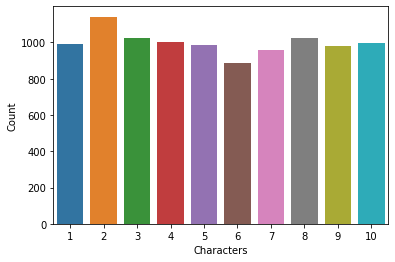

In [53]:
import seaborn as sns
label = [1,2,3,4,5,6,7,8,9,10]
ax = sns.barplot(x = label, y = count_values)
ax.set(xlabel = 'Characters', ylabel = 'Count')

Text(0.5, 1.0, 'Character Counting')

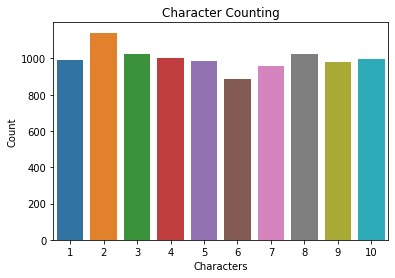

In [54]:
import seaborn as sns
label = [1,2,3,4,5,6,7,8,9,10]
ax = sns.barplot(x = label, y = count_values)
plt.xlabel('Characters')
plt.ylabel('Count')
plt.title('Character Counting')

In [72]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, list(map(int, y_pred_list)))
print(conf_mat)

[[   0  970    1    2    0    1    1    4    1    0    0]
 [   0    0 1128    2    0    0    0    4    1    0    0]
 [   0    1    2 1018    0    0    0    2    6    3    0]
 [   0    0    0    2  994    0    7    0    4    3    0]
 [   0    0    0    1    0  977    0    0    0    0    4]
 [   0    1    0    1    6    0  882    2    0    0    0]
 [   0    1    2    1    0    1    2  950    0    1    0]
 [   0    1    2    7    0    0    0    0 1012    2    4]
 [   0    4    1    3    1    0    2    3    2  957    1]
 [   0    3    3    1    1    5    4    1    6    3  982]
 [   0    0    0    0    0    0    0    0    0    0    0]]


C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Text(0.5, 15.0, 'Predicted label')

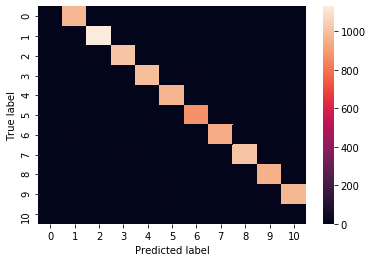

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, list(map(int, y_pred_list)))
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [45]:
y_pred_list_array = list(map(int, y_pred_list))
y_pred_list_array

[8,
 3,
 2,
 1,
 5,
 2,
 5,
 10,
 7,
 10,
 1,
 7,
 10,
 1,
 2,
 6,
 10,
 8,
 4,
 5,
 10,
 7,
 7,
 6,
 5,
 1,
 8,
 5,
 1,
 2,
 4,
 2,
 4,
 5,
 8,
 3,
 8,
 2,
 3,
 2,
 2,
 8,
 5,
 3,
 4,
 6,
 2,
 3,
 5,
 5,
 7,
 4,
 6,
 6,
 7,
 1,
 5,
 2,
 10,
 6,
 8,
 9,
 6,
 4,
 8,
 5,
 7,
 5,
 4,
 1,
 8,
 1,
 3,
 10,
 2,
 8,
 4,
 3,
 10,
 8,
 8,
 7,
 3,
 8,
 9,
 5,
 8,
 4,
 7,
 2,
 4,
 7,
 5,
 4,
 2,
 5,
 2,
 8,
 7,
 10,
 7,
 1,
 6,
 5,
 10,
 10,
 3,
 2,
 10,
 5,
 9,
 8,
 4,
 10,
 8,
 5,
 5,
 5,
 10,
 3,
 6,
 5,
 8,
 7,
 8,
 10,
 1,
 6,
 9,
 6,
 7,
 7,
 6,
 8,
 9,
 2,
 1,
 2,
 7,
 5,
 7,
 8,
 4,
 2,
 8,
 2,
 9,
 3,
 1,
 3,
 10,
 9,
 6,
 6,
 2,
 6,
 7,
 1,
 4,
 5,
 5,
 7,
 6,
 5,
 7,
 6,
 5,
 6,
 2,
 5,
 5,
 8,
 3,
 4,
 3,
 8,
 2,
 9,
 2,
 9,
 2,
 9,
 6,
 1,
 9,
 10,
 3,
 6,
 1,
 2,
 2,
 2,
 1,
 10,
 1,
 4,
 2,
 7,
 5,
 3,
 4,
 7,
 2,
 2,
 2,
 4,
 10,
 6,
 3,
 10,
 5,
 6,
 10,
 4,
 10,
 1,
 4,
 7,
 6,
 6,
 8,
 3,
 3,
 8,
 2,
 3,
 9,
 5,
 2,
 8,
 4,
 4,
 9,
 9,
 8,
 10,
 3,
 3,
 5,
 2,
 6,
 10,
 9,
 8,


In [46]:
# Normalizing y_pred 
from numpy import mean
for i in range(len(y_pred_list_array)):
    y_pred_list_array[i] = y_pred_list_array[i] - mean(y_pred_list_array)
print(y_pred_list_array)

[2.5660999999999996, -2.4333566099999997, -3.432813274339, -4.432269993011566, -0.43172676601226456, -3.431183593335663, -0.43064047497632973, 4.569902589071168, 1.5704455988122605, 4.570988554252379, -4.428468544603046, 1.5720743022514148, 4.572617094821189, -4.426840166888293, -3.426297482871604, 0.5742451468766827, 4.574787722361995, 2.575330243589759, -1.4241272894345993, -0.4235848767056565, 4.576957481782014, 1.5774997860338358, 1.5780420360552325, 0.578584231851627, -0.42087362657155847, -4.420331539208901, 2.58021049394502, -0.41924752710437474, -4.418705602351664, -3.418163731791429, -1.4176219154182501, -3.417080153226708, -1.4165384452113852, -0.4159967913668643, 2.5845448083122724, -2.414913646168559, 2.5856278451960577, -3.4138307175884623, -2.413289334516703, -3.412748005583251, -3.4122067307826924, 2.5883344898903857, -0.41112434355860294, -2.4105832311242477, -1.410042172801135, 0.590498831416145, -3.408960218466997, -2.40841932244515, -0.4078784805129061, -0.4073376926

C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Text(0.5, 15.0, 'Predicted label')

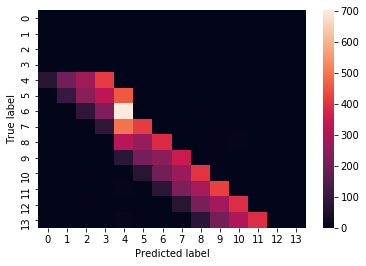

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, list(map(int, y_pred_list_array)))
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [62]:
import pandas as pd
import numpy as np
# initialize list of lists
data = [label,count_values,count_values_test]

#tranposing
numpy_array = np. array(data)
transpose = numpy_array.transpose()
data = transpose.tolist()
print(data)
    
# Create the pandas DataFrame 
columns = ["label","count_values", "count_values_test"]
df = pd.DataFrame(data, columns = ['label','count_values', 'count_values_test']) 

[[1, 993, 1135], [2, 1142, 1032], [3, 1027, 1010], [4, 1004, 982], [5, 984, 892], [6, 888, 958], [7, 959, 1028], [8, 1022, 974], [9, 982, 1009], [10, 999, 980]]


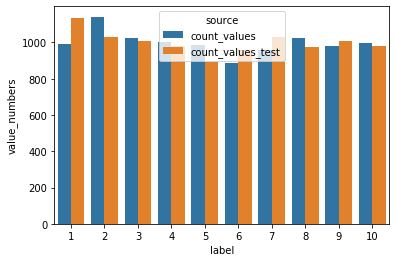

In [63]:
test_data_melted = pd.melt(df, id_vars=columns[0],
                           var_name="source", value_name="value_numbers")
g = sns.barplot(x=columns[0], y="value_numbers", hue="source",
                data=test_data_melted)

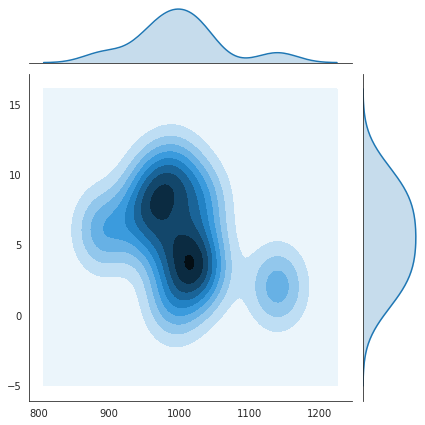

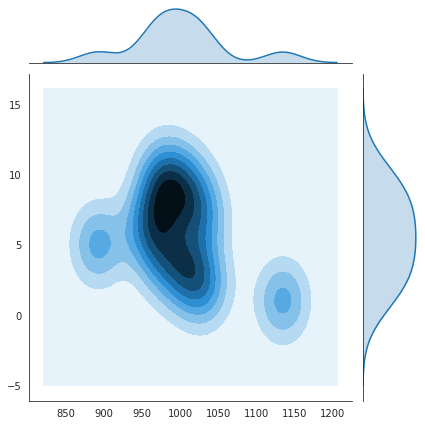

In [17]:
with sns.axes_style('white'):
    sns.jointplot(count_values, label, kind='kde');
with sns.axes_style('white'):
    sns.jointplot(count_values_test, label, kind='kde');

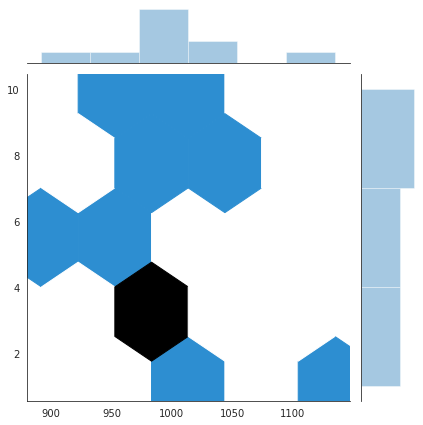

In [7]:
with sns.axes_style('white'):
    sns.jointplot(count_values_test, label, kind='hex')

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot(count_values, label, "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

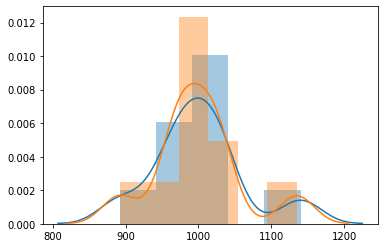

In [4]:
sns.distplot(count_values)
sns.distplot(count_values_test)

In [136]:
count_values_support = []
count_values_test_support = []
for i in range(len(count_values)):
    count_values_support.append([i+1,count_values[i]])
    count_values_test_support.append([i+1,count_values_test[i]])
print(count_values_support)
print(count_values_test_support)

[[1, 993], [2, 1140], [3, 1031], [4, 1023], [5, 984], [6, 892], [7, 948], [8, 1029], [9, 966], [10, 994]]
[[1, 1135], [2, 1032], [3, 1010], [4, 982], [5, 892], [6, 958], [7, 1028], [8, 974], [9, 1009], [10, 980]]


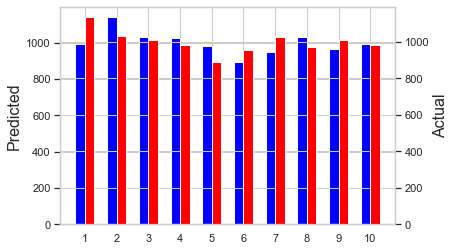

In [139]:
x1,y1 = zip(*count_values_support)
x2,y2 = zip(*count_values_test_support)

fig, ax = plt.subplots()
ax.bar(np.array(x1)-0.15, y1, width = 0.3, color='blue')
ax.set_ylabel('Predicted', fontsize=16)

ax2 = ax.twinx()
ax2.bar(np.array(x2)+0.15, y2, width = 0.3, color='red')
ax2.set_ylabel('Actual', fontsize=16)


plt.xlabel('Characters')
plt.xticks(range(min(x1+x2), max(x1+x2)+1))
plt.show()

<BarContainer object of 7 artists>

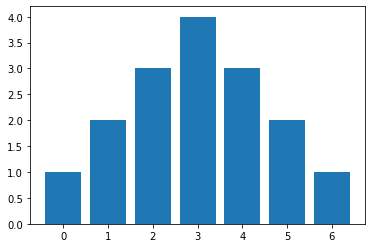

In [86]:
plt.bar(range(7), [1, 2, 3, 4, 3, 2, 1])

In [94]:
type(y_pred_list)

numpy.ndarray

In [19]:
print(y_test)

[7 2 1 ... 4 5 6]


Great. So, we got a beautiful accuracy of 99.4% on our model. 

## Predicting Individual Characters

1


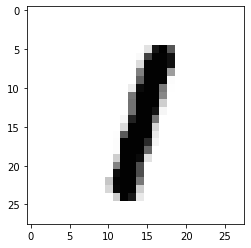

In [16]:
img_rows = 28
img_cols = 28
image_index = 7344
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = classifier.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

6


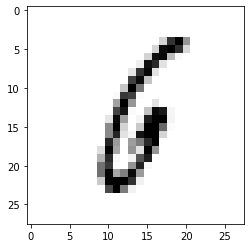

In [17]:
img_rows = 28
img_cols = 28
image_index = 3344
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = classifier.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

### K-Fold Cross Validation 

In K-Fold Validation, we normally split the training set into further 2 parts, the training set and the the cross validation set. The cross-validation set can be used for multiple purposes - fitting the best parameters of the model using Grid Search, finding accuracies on multiple batches of the set, for urther reassurance the our is really working well. The term k-Fold implies the same, making k batches of the cross - validation of the set , fitting on each batch and calculating accuracies.

But since, we have already reached 99.6% of our model, and we aren't under the pressure of getting the best out of our model, we can apply Cross Validation on the same training set. And then sumarize diagnostics and perfomances of our set by visualazing our data.

In [26]:
#Predicting accuracy of each batch (all batches contain 6000 training examples each)
a = 0
b = 6000
accuracy = []
for j in range(10):
    X_val = x_train[a:b]
    y_val = y_train[a:b]
    _, val_acc = classifier.evaluate(X_val, y_val, verbose = 1)
    accuracy.append(val_acc)
    a = a + 6000
    b = b + 6000
print(*accuracy,sep="\n")

6000/6000 [==============================] - 1s 156us/step
0.9988333582878113
0.9984999895095825
0.9984999895095825
0.9975000023841858
0.9988333582878113
0.9984999895095825
0.9981666803359985
0.9980000257492065
0.9986666440963745
0.9988333582878113


In [52]:
#Defined our CNN Model in a function
def define_model():
    # Initialising the CNN
    classifier = Sequential()

    # Step 1 - Convolution
    classifier.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))

    # Step 2 - Pooling
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    # Step 3 - Flattening
    classifier.add(Flatten())

    # Step 4 - Full connection
    classifier.add(Dense(128, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(10, activation = 'softmax'))

    classifier.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return classifier

In [56]:
#Applying K-Fold Cross Validation
from sklearn.model_selection import KFold
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(10, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(x_train):
    # define model
    model = define_model()
    # select rows for train and test
    trainX, trainY, testX, testY = x_train[train_ix], y_train[train_ix], x_train[test_ix], y_train[test_ix]
    # fit model
    history = classifier.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = classifier.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)

> 99.450
> 99.617
> 99.917
> 99.933
> 99.933
> 99.917
> 99.967
> 99.950
> 99.950
> 99.967


C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Users\devan\anaconda3\envs\tesnor\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecati

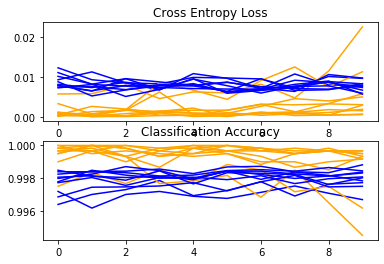

In [57]:
#Summarize Diagnostics
for i in range(len(histories)):
    # plot loss
    pyplot.subplot(2, 1, 1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
pyplot.show()

Accuracy: mean=99.860 std=0.168, n=10


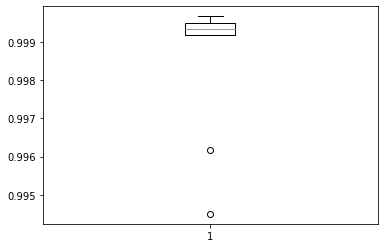

In [60]:
#Summarize Performance
from numpy import mean,std
# print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
pyplot.boxplot(scores)
pyplot.show()